<a href="https://colab.research.google.com/github/nakampany/machine-learning-project/blob/master/%E3%82%B5%E3%83%9D%E3%83%BC%E3%83%88%E3%83%99%E3%82%AF%E3%83%88%E3%83%AB%E3%83%9E%E3%82%B7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **データ収集**

In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]#3分類
y = iris.target

In [ ]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [ ]:
X.shape

(150, 2)

In [ ]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **標準化**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
print(X_test_std)

[[ 0.70793846  1.51006688]
 [ 0.09545238 -0.29318114]
 [-1.35224199 -1.32360858]
 [ 1.37610509  0.7372463 ]
 [-1.29656144 -1.32360858]
 [ 1.20906343  1.63887031]
 [-1.40792255 -1.19480515]
 [ 0.48521625  0.35083601]
 [ 0.5408968   0.22203258]
 [ 0.09545238  0.09322915]
 [ 0.98634122  0.22203258]
 [ 0.37385514  0.35083601]
 [ 0.48521625 -0.03557428]
 [ 0.42953569  0.35083601]
 [ 0.48521625  0.22203258]
 [-1.35224199 -1.45241201]
 [ 0.37385514  0.35083601]
 [ 0.31817459 -0.03557428]
 [-1.35224199 -1.19480515]
 [-1.40792255 -1.06600172]
 [ 0.59657735  0.99485316]
 [ 0.37385514  0.35083601]
 [-1.07383923 -1.32360858]
 [-1.35224199 -1.32360858]
 [ 0.5408968   0.7372463 ]
 [-1.57496421 -1.32360858]
 [-1.07383923 -1.06600172]
 [ 0.26249403  0.09322915]
 [-0.29431149 -0.29318114]
 [-1.24088089 -1.06600172]
 [ 0.93066067  0.7372463 ]
 [ 0.37385514  0.35083601]
 [-1.29656144 -1.32360858]
 [ 0.59657735  0.7372463 ]
 [ 0.98634122  1.25246002]
 [ 0.03977182  0.22203258]
 [-1.18520034 -1.19480515]
 

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

In [ ]:

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    #
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]
        #
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# **サポートベクトルマシン**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=0)

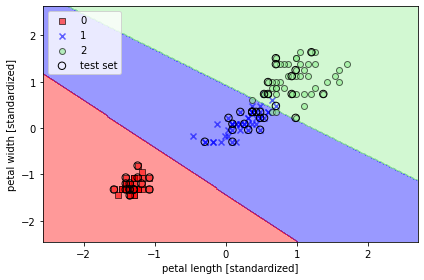

In [ ]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_linear.png', dpi=300)
plt.show()

# **非線形問題**

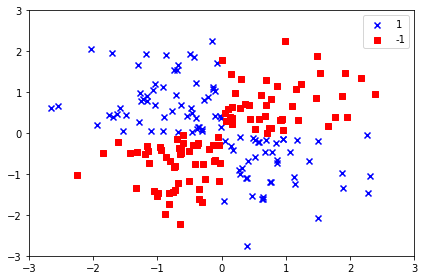

In [ ]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

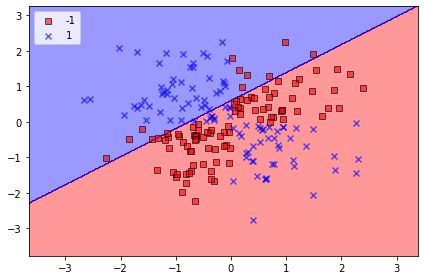

In [ ]:
#分類できない
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_xor.png', dpi=300)
plt.show()

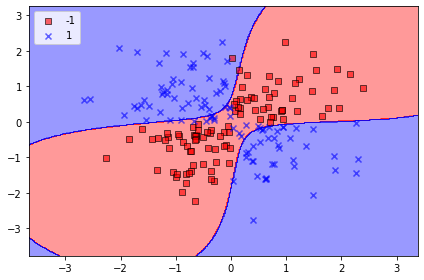

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_xor.png', dpi=300)
plt.show()

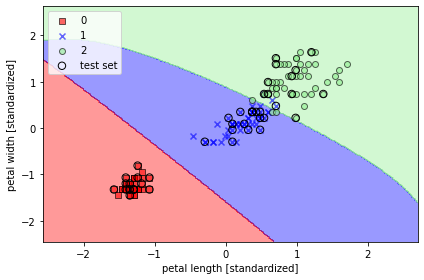

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_1.png', dpi=300)
plt.show()

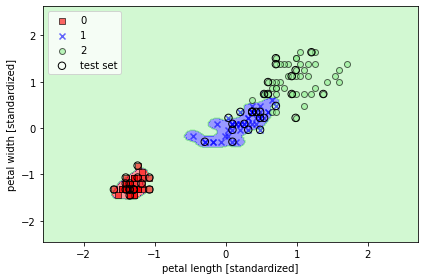

In [ ]:
#γを大きくすると、過学習!!!
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('./figures/support_vector_machine_rbf_iris_2.png', dpi=300)
plt.show()
